##Making the Causal Faithfulness Assumption

Note: 
If we create a
causal DAG G and assume
1. (G, P) satisfies the Markov condition,
2. All conditional independencies in the observed distribution P
are entailed by the Markov condition in G,

then we say we are making the **causal faithfulness assumption**.

Besides those conditions already stated for the causal Markov assumption to hold, the following additional conditions must be satisfied
for the causal faithfulness assumption to hold:
1. We can’t have ‘unusual’ causal relationships
2. We cannot draw an edge from X to Y if for every causal path
from X to Y there is a causal mediary in the set of observed
variables.



###Example 1

Suppose V is our set of observed variables, V = {X, Y}, and our set of conditional independencies is {I(X,Y)}.

There are 3 possibilities of the causal DAG that we will make.

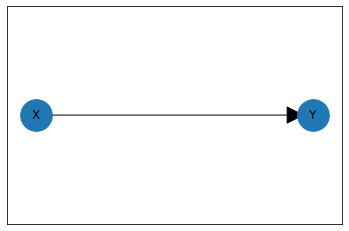

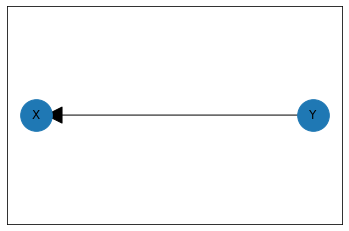

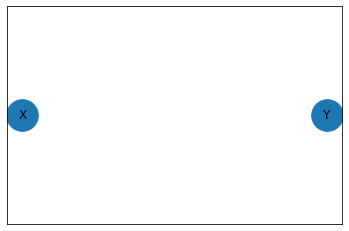

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


DG = nx.DiGraph()
DG.add_edges_from([('X','Y')])
pos = nx.planar_layout(DG)
nx.draw_networkx_nodes(DG, pos, node_size = 1000)
nx.draw_networkx_edges(DG, pos, edgelist=DG.edges(), edge_color='black', arrowsize=40)
nx.draw_networkx_labels(DG, pos)
plt.show()
DG2 = nx.DiGraph()
DG2.add_edges_from([('Y','X')])
pos2 = nx.planar_layout(DG2)
nx.draw_networkx_nodes(DG2, pos, node_size = 1000)
nx.draw_networkx_edges(DG2, pos, edgelist=DG2.edges(), edge_color='black', arrowsize=40)
nx.draw_networkx_labels(DG2, pos)
plt.show()
DG3 = nx.DiGraph()
DG3.add_node('X')
DG3.add_node('Y')
pos3 = nx.planar_layout(DG3)
nx.draw_networkx_nodes(DG3, pos, node_size = 1000)
nx.draw_networkx_labels(DG3, pos)
plt.show()

Out of these possibilities, we cannot have the first or the second one, The
reason is that the Markov condition, applied to these DAGs, does not
entail that X and Y are independent, which means the causal faithfulness assumption is not satisfied. So we must have the causal DAG
as in third. We conclude X and Y have no causal influence on
each other.

###Example 3

Suppose V = {X, Y, Z} and our set of conditional independencies is
{I(X, Y )}.

Then there can be no edge between X and Y in the causal DAG owing
to the reason given in Example 1. Furthermore, there must be edges
between X and Z and between Y and Z.

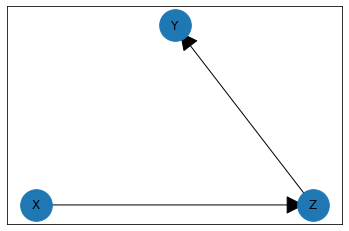

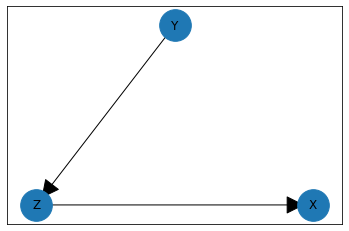

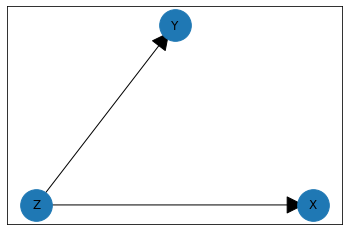

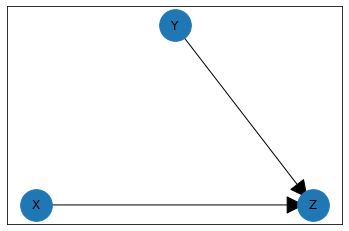

In [ ]:
DG4 = nx.DiGraph()
DG4.add_edges_from([('X','Z'),('Z','Y')])
pos4 = nx.planar_layout(DG4)
nx.draw_networkx_nodes(DG4, pos4, node_size = 1000)
nx.draw_networkx_edges(DG4, pos4, edgelist=DG4.edges(), edge_color='black', arrowsize=40)
nx.draw_networkx_labels(DG4, pos4)
plt.show()
DG5 = nx.DiGraph()
DG5.add_edges_from([('Z','X'),('Y','Z')])
pos5 = nx.planar_layout(DG5)
nx.draw_networkx_nodes(DG5, pos5, node_size = 1000)
nx.draw_networkx_edges(DG5, pos5, edgelist=DG5.edges(), edge_color='black', arrowsize=40)
nx.draw_networkx_labels(DG5, pos5)
plt.show()
DG6 = nx.DiGraph()
DG6.add_edges_from([('Z','X'),('Z','Y')])
pos6 = nx.planar_layout(DG6)
nx.draw_networkx_nodes(DG6, pos6, node_size = 1000)
nx.draw_networkx_edges(DG6, pos6, edgelist=DG6.edges(), edge_color='black', arrowsize=40)
nx.draw_networkx_labels(DG6, pos6)
plt.show()
DG7 = nx.DiGraph()
DG7.add_edges_from([('X','Z'),('Y','Z')])
pos7 = nx.planar_layout(DG7)
nx.draw_networkx_nodes(DG7, pos7, node_size = 1000)
nx.draw_networkx_edges(DG7, pos7, edgelist=DG7.edges(), edge_color='black', arrowsize=40)
nx.draw_networkx_labels(DG7, pos7)
plt.show()

We cannot have any of the causal DAGs in the first three plots. The reason is that the Markov condition, applied to these
DAGs, entails I(X, Y | Z), and this conditional independency is not
present. So the Markov condition would not be satisfied. Furthermore,
the Markov condition, applied to these DAGs, does not entail I(X, Y).
So the causal DAG must be the DAG in the fourth plot. We conclude
that X and Y each cause Z.

##Theorem : If (G, P) satisfies the faithfulness condition, then there is an edge between X and Y if and only if X and Y are not conditionally independent given any set of variables.

###Example 3
Suppose V = {X, Y, Z, W} and our set of conditional
independencies is
{I(X, Y), I(W, {X, Y} | Z)}.

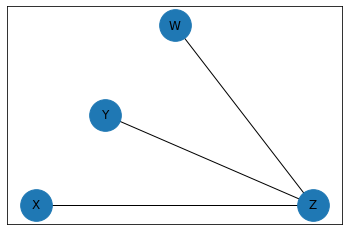

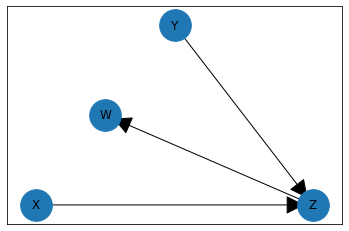

In [ ]:
G = nx.Graph()
G.add_edges_from([('X','Z'),('Y','Z'),('Z','W')])
pos8 = nx.planar_layout(G)
nx.draw_networkx_nodes(G, pos8, node_size = 1000)
nx.draw_networkx_edges(G, pos8, edgelist=G.edges(), edge_color='black')
nx.draw_networkx_labels(G, pos8)
plt.show()
DG8 = nx.DiGraph()
DG8.add_edges_from([('X','Z'),('Y','Z'),('Z','W')])
pos9 = nx.planar_layout(DG8)
nx.draw_networkx_nodes(DG8, pos9, node_size = 1000)
nx.draw_networkx_edges(DG8, pos9, edgelist=DG8.edges(), edge_color='black', arrowsize=40)
nx.draw_networkx_labels(DG8, pos9)
plt.show()

Owing to the Theorem, the links (edges without regard for direction)
must be as shown in the first plot. We must have the directed edges
shown in the second plot because we have I(X, Y ). Therefore, we must
also have the directed edge shown in the second plot because we do not
have I(W, X). We conclude X and Y each cause Z and Z causes W.

##Making Only the Causal Embedded Faithfulness Assumption

If we assume
the observed probability distribution P of the variables is embedded
faithfully in a causal DAG containing the variables, we say we are
making the **causal embedded faithfulness assumption**. 

Suppose
we have a probability distribution P of the variables in a set V, V is
a subset of W, and G is a DAG whose set of nodes is W. Then P is
embedded faithfully in W if all and only the conditional independencies in P are entailed by the Markov condition applied to W and
restricted to the nodes in V.

###Example 1

Using the data base collected by the U.S. News and
World Record magazine for the purpose of college ranking, Druzdzel
and Glymour [1] analyzed the influences that affect university student
retention rate. By ‘student retention rate’ we mean the percent of entering freshmen who end up graduating from the university at which
they initially matriculate. Low student retention rate is a major concern at many American universities as the mean retention rate over
all American universities is only 55%. 

The data base provided by the U.S. News and World Record magazine contains records for 204 United States universities and colleges
identified as major research institutions. Each record consists of over
100 variables. The data was collected separately for the years 1992 and 1993. Druzdzel and Glymour [1] selected the following eight variables
as being most relevant to their study:

| <font size="5"> Variable </font> | <font size="5"> What Variable Represents </font> |
|----------|:-------------------------|
| <font size="4"> grad </font> | <font size="4"> Fraction of entering students graduating from the institution </font> |
| <font size="4"> rejr </font> | <font size="4"> Fraction of applicants who are not offered admission </font> |
| <font size="4"> tstsc </font> | <font size="4"> Average standardized score of incoming students </font> | 
| <font size="4"> tp10 </font> | <font size="4"> Fraction of incoming students in the top 10% in high school </font> | 
| <font size="4"> acpt </font> | <font size="4"> Fraction of students accepting the institution’s admission offer </font> |
| <font size="4"> spnd </font> | <font size="4"> Average educational and general expenses per student </font> | 
| <font size="4"> sfrat </font> | <font size="4"> Student/faculty ratio </font> |
| <font size="4"> salar </font> | <font size="4"> Average faculty salary </font> | 

Druzdzel and Glymour [1] used Tetrad II [2] to learn causal influences from the data. Tetrad II uses the previously mentioned algorithm
developed by Spirtes et al. [3] to learn causal structure from data.
Tetrad II allows the user to enter a significance level. A significance
level of α means the probability of rejecting a conditional independency
hypothesis, when it it is true, is α. Therefore, the smaller the value α,
the less likely we are to reject a conditional independency, and therefore the sparser our resultant graph. Figure 2.15 shows the graphs,
which Druzdzel and Glymour [1] learned from U.S. News and World
Record’s 1992 data base using significance levels of .2, .1, .05, and
.01. In those graphs, an edge X → Y indicates either X has a causal
influence on Y , or X and Y have a hidden common cause or both; an
edge X ⟷ Y indicates X and Y have a hidden common cause; and
an edge X ⟹ Y indicates X has a causal influence on Y and they do
not have a hidden common cause.


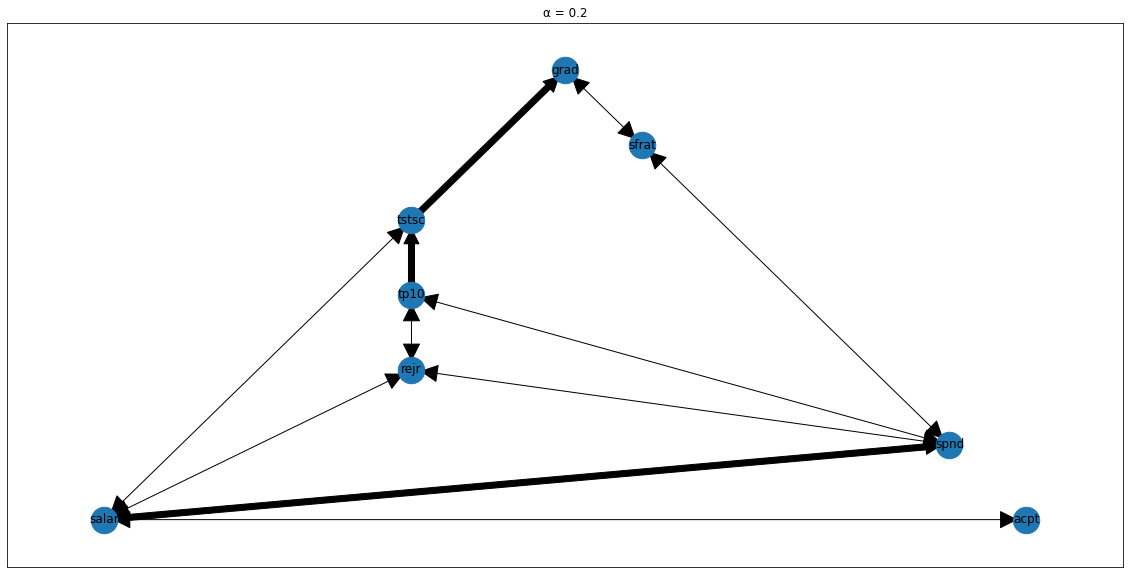

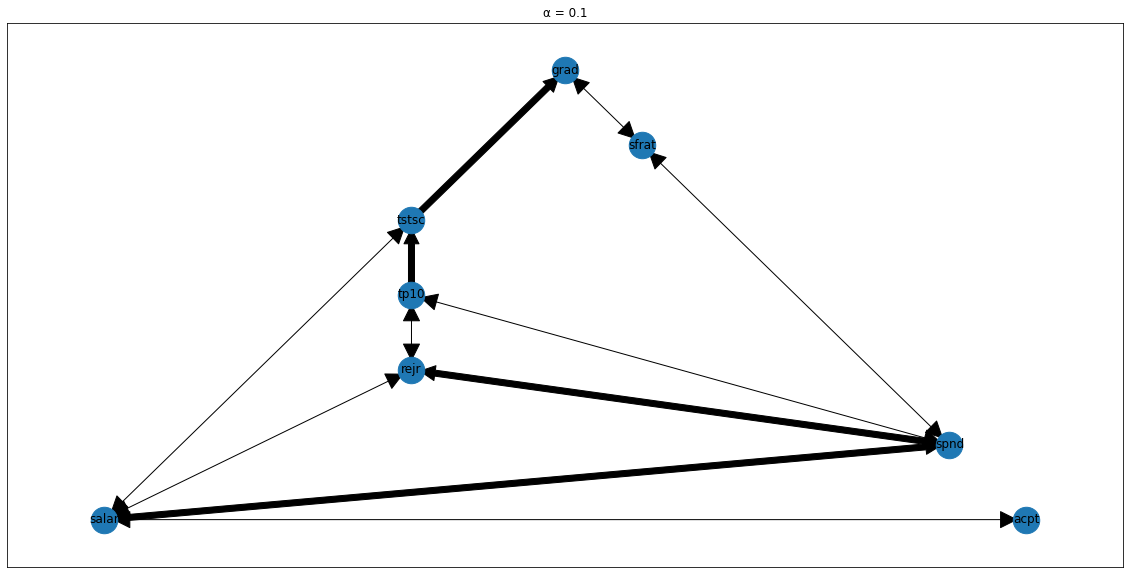

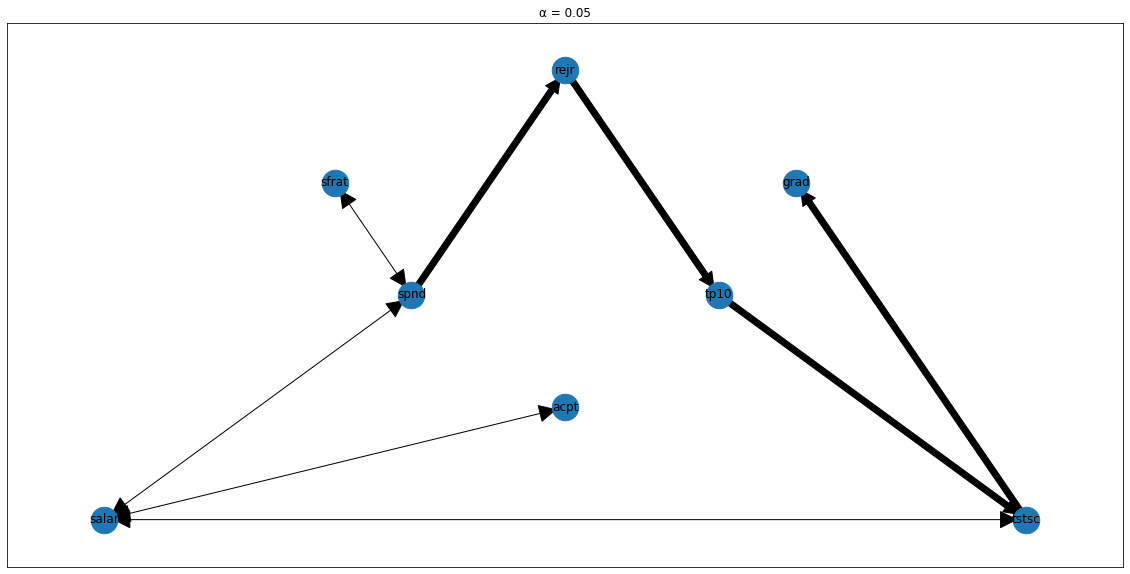

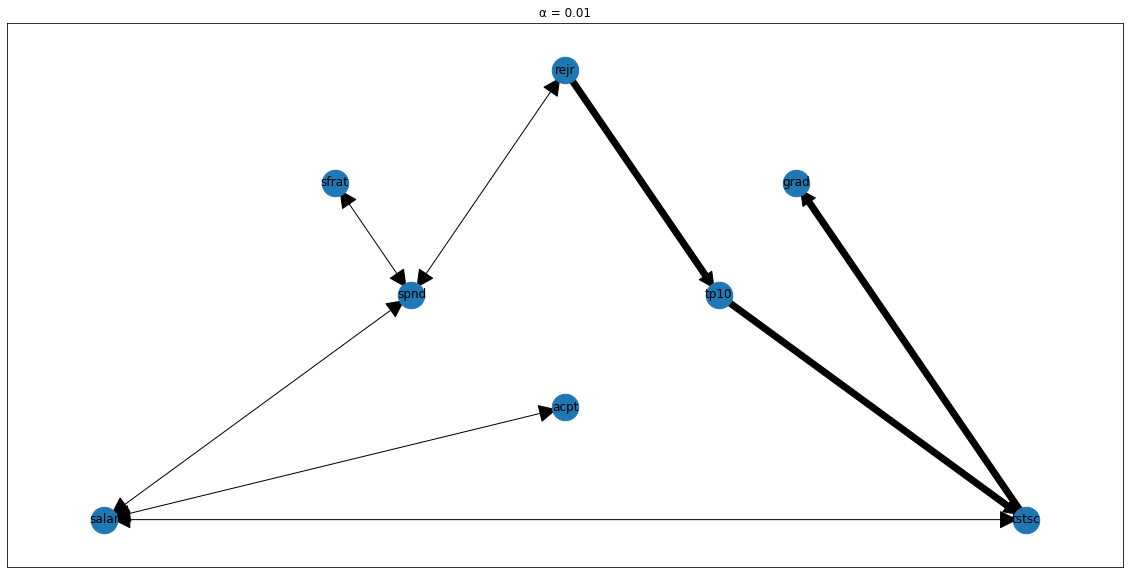

In [ ]:
DG9 = nx.DiGraph()
DG9.add_edges_from([('salar','acpt'),('salar','tstsc'),('salar','rejr'),('salar','spnd'),('rejr','spnd'),('rejr','tp10'),('spnd','tp10'),('tp10','tstsc'),('spnd','sfrat'),('tstsc','grad'),('grad','sfrat')])
pos10 = nx.planar_layout(DG9)
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
nx.draw_networkx_nodes(DG9, pos10, node_size = 700)
nx.draw_networkx_edges(DG9, pos10, edgelist=[('salar','acpt'),('salar','tstsc'),('salar','rejr'),('rejr','spnd'),('rejr','tp10'),('spnd','tp10'),('spnd','sfrat'),('grad','sfrat')], edge_color='black', arrowsize=40, arrowstyle='<|-|>')
nx.draw_networkx_edges(DG9, pos10, edgelist=[('salar','spnd'),('tp10','tstsc'),('tstsc','grad')], edge_color='black', arrowsize=30, arrowstyle='simple')
nx.draw_networkx_labels(DG9, pos10)
plt.title("α = 0.2")
plt.show()

DG10 = nx.DiGraph()
DG10.add_edges_from([('salar','acpt'),('salar','tstsc'),('salar','rejr'),('salar','spnd'),('spnd','rejr'),('rejr','tp10'),('spnd','tp10'),('tp10','tstsc'),('spnd','sfrat'),('tstsc','grad'),('grad','sfrat')])
pos11 = nx.planar_layout(DG10)
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
nx.draw_networkx_nodes(DG10, pos11, node_size = 700)
nx.draw_networkx_edges(DG10, pos11, edgelist=[('salar','acpt'),('salar','tstsc'),('salar','rejr'),('rejr','tp10'),('spnd','tp10'),('spnd','sfrat'),('grad','sfrat')], edge_color='black', arrowsize=40, arrowstyle='<|-|>')
nx.draw_networkx_edges(DG10, pos11, edgelist=[('salar','spnd'),('tp10','tstsc'),('tstsc','grad'),('spnd','rejr')], edge_color='black', arrowsize=30, arrowstyle='simple')
nx.draw_networkx_labels(DG10, pos11)
plt.title("α = 0.1")
plt.show()

DG11 = nx.DiGraph()
DG11.add_edges_from([('salar','acpt'),('salar','tstsc'),('salar','spnd'),('spnd','rejr'),('rejr','tp10'),('tp10','tstsc'),('spnd','sfrat'),('tstsc','grad')])
pos12 = nx.planar_layout(DG11)
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
nx.draw_networkx_nodes(DG11, pos12, node_size = 700)
nx.draw_networkx_edges(DG11, pos12, edgelist=[('salar','spnd'),('salar','acpt'),('salar','tstsc'),('spnd','sfrat')], edge_color='black', arrowsize=40, arrowstyle='<|-|>')
nx.draw_networkx_edges(DG11, pos12, edgelist=[('tp10','tstsc'),('tstsc','grad'),('spnd','rejr'),('rejr','tp10')], edge_color='black', arrowsize=30, arrowstyle='simple')
nx.draw_networkx_labels(DG11, pos12)
plt.title("α = 0.05")
plt.show()

DG12 = nx.DiGraph()
DG12.add_edges_from([('salar','acpt'),('salar','tstsc'),('salar','spnd'),('spnd','rejr'),('rejr','tp10'),('tp10','tstsc'),('spnd','sfrat'),('tstsc','grad')])
pos13 = nx.planar_layout(DG12)
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
nx.draw_networkx_nodes(DG12, pos13, node_size = 700)
nx.draw_networkx_edges(DG12, pos13, edgelist=[('salar','spnd'),('salar','acpt'),('salar','tstsc'),('spnd','sfrat'),('spnd','rejr')], edge_color='black', arrowsize=40, arrowstyle='<|-|>')
nx.draw_networkx_edges(DG12, pos13, edgelist=[('tp10','tstsc'),('tstsc','grad'),('rejr','tp10')], edge_color='black', arrowsize=30, arrowstyle='simple')
nx.draw_networkx_labels(DG12, pos13)
plt.title("α = 0.01")
plt.show()

Although different graphs were obtained at different levels of significance, all the graphs above show that average standardized test
score (tstsc) has a direct causal influence on graduation rate (grad),
and no other variable has a direct causal influence on grad. The results for the 1993 data base were not as overwhelming, but they too
indicated tstsc to be the only direct causal influence of grad.
To test whether the causal structure may be di
erent for top research universities, Druzdzel and Glymour [1] repeated the study using
only the top 50 universities according to the ranking of U.S. News and
World Report. The results were similar to those for the complete data
base.

These result indicate that, although factors such as spending per
student and faculty salary may have an influence on graduation rates,
they do this only indirectly by a
ecting the standardized test scores of
matriculating students. If the results correctly model reality, retention
rates can be improved by bringing in students with higher test scores
in any way whatsoever. Indeed, in 1994 Carnegie Mellon changed
its financial aid policies to assign a portion of its scholarship fund
on the basis of academic merit. Druzdzel and Glymour [1] note that
this resulted in an increase in the average test scores of matriculating
freshman classes and an increase in freshman retention.

Before closing, we note that the notion that average test score has
a causal influence on graduation rate does not fit into common notions
of causation such as the one concerning manipulation. For example,
if we manipulated a university’s average test score by accessing the
testing agency’s database and changing the scores of the university’s
students to much higher values, we would not expect the university’s
graduation rate to increase. Rather this study indicates that test score
is a near perfect indicator of some other variable, which we can call
‘graduation potential’.


###Example 2

Scarville et al. [4] provide a data base obtained from a
survey in 1996 of experiences of racial harassment and discrimination
of military personnel in the United States Armed Forces. Surveys were distributed to 73,496 members of the U.S. Army, Navy, Marine Corps,
Air Force and Coast Guard. The survey sample was selected using a
nonproportional stratified random sample in order to ensure adequate
representation of all subgroups. Usable surveys were received from
39,855 service members (54%). The survey consisted of 81 questions
related to experiences of racial harassment and discrimination and job
attitudes. Respondents were asked to report incidents that had occurred
during the previous 12 months. The questionnaire asked participants
to indicate the occurrence of 57 different types of racial/ethnic harassment or discrimination. Incidents ranged from telling offensive jokes
to physical violence, and included harassment by military personnel as
well as the surrounding community. Harassment experienced by family
members was also included.

Neapolitan and Morris [5] used Tetrad III in an attempt to learn
causal influences from the data base. For their analysis, 9640 records
(13%) were selected which had no missing data on the variables of
interest. The analysis was initially based on eight variables. Similar
to the situation concerning university retention rates, they found one
causal relationship to be present regardless of the significance level.
That is, they found that whether the individual held the military responsible for the racial incident had a direct causal influence on the
individual’s race. Since this result made no sense, they investigated
which variables were involved in Tetrad III learning this causal influence. The five variables involved are the following:

| <font size="4"> Variable </font> | <font size="4"> What the Variable Represents </font> |
|----------|:-----------------------------|
| <font size="4"> race </font> | <font size="4"> Respondent's race/ethnicity </font> |
| <font size="4"> yos </font> | <font size="4"> Respondent's years of military service </font> |
| <font size="4"> inc </font>| <font size="4"> Did respondent experience a racial incident? </font> |
| <font size="4"> rept </font> | <font size="4"> Was incident reported to military personnel? </font> |
| <font size="4"> resp </font> | <font size="4"> Did respondent hold military responsible for incident? </font> |

The variable race consisted of five categories: White, Black, Hispanic,
Asian or Pacific Islander, and Native American or Alaskan Native. Respondents who reported Hispanic ethnicity were classified as Hispanic, regardless of race. Respondents were classified based on self-identification at the time of the survey. Missing data were replaced
with data from administrative records. The variable yos was classified
into four categories: 6 years or less, 7-11 years, 12-19 years, and 20
years or more. The variable inc was coded dichotomously to indicate
whether any type of harassment was reported on the survey. The variable rept indicates responses to a single question concerning whether
the incident was reported to military and/or civilian authorities. This
variable was coded 1 if an incident had been reported to military officials. It was coded 0 if an individual experienced no incident, did not
report the incident, or only reported the incident to civilian officials.
The variable resp indicates responses to a single question concerning
whether the respondent believed the military to be responsible for an
incident of harassment. This variable was coded 1 if the respondent
indicated that the military was responsible for some or all of a reported
incident. If the respondent indicated no incident, unknown responsibility, or that the military was not responsible, the variable was coded
0.

They reran the experiment using only these five variables, and
again at all levels of significance, they found that resp had a direct causal influence on race. In all cases, this causal influence was learned
because rept and yos were found to be probabilistically independent,
and there was no edge between race and inc. That is, the causal connection between race and inc is mediated by other variables. Figure
2.16 shows the graph obtained at the .01 significance level. The edges
yos ⟶ inc and rept ⟶ inc are directed towards inc because yos and
rept were found to be independent. The edge yos ⟶ inc resulted in the
edge inc ⟹ resp being directed the way it was, which in turn resulted
in resp ⟹ race being directed the way it was. If there had been an
edge between inc and race, the edge between resp and race would not have been directed.

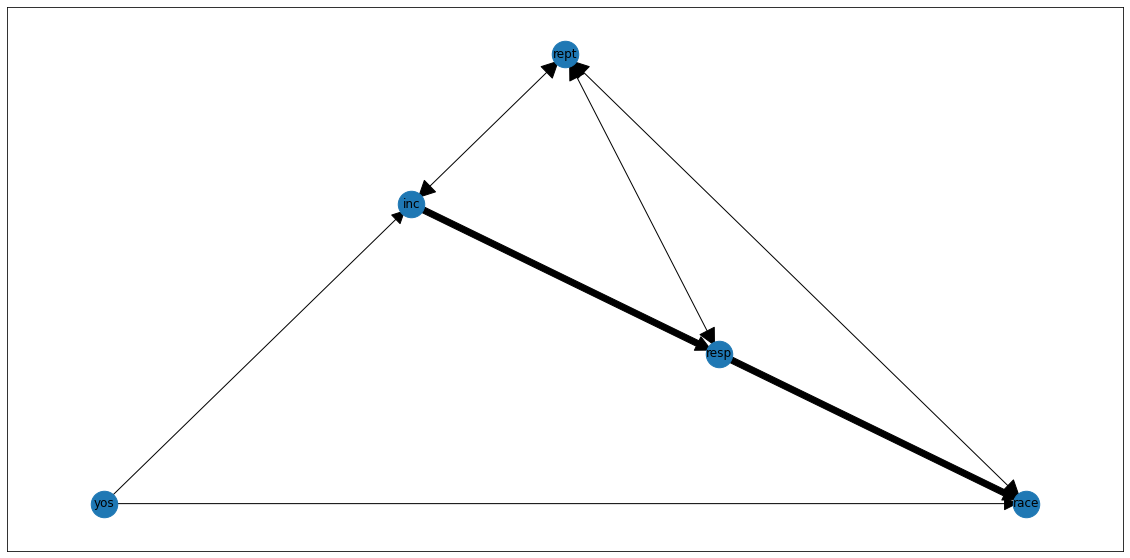

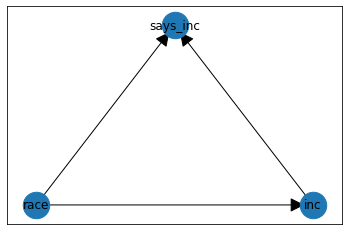

In [ ]:
DG13 = nx.DiGraph()
DG13.add_edges_from([('yos','race'),('yos','inc'),('inc','resp'),('resp','race'),('inc','rept'),('rept','race'),('rept','resp')])
pos14 = nx.planar_layout(DG13)
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
nx.draw_networkx_nodes(DG13, pos14, node_size = 700)
nx.draw_networkx_edges(DG13, pos14, edgelist=[('inc','rept'),('resp','rept'),('rept','race'),], edge_color='black', arrowsize=40, arrowstyle='<|-|>')
nx.draw_networkx_edges(DG13, pos14, edgelist=[('inc','resp'),('resp','race')], edge_color='black', arrowsize=30, arrowstyle='simple')
nx.draw_networkx_edges(DG13, pos14, edgelist=[('yos','inc'),('yos','race')], edge_color='black', arrowsize=30)
nx.draw_networkx_labels(DG13, pos14)
plt.show()

DG14 = nx.DiGraph()
DG14.add_edges_from([('race','inc'),('inc','says_inc'),('race','says_inc')])
pos15 = nx.planar_layout(DG14)
nx.draw_networkx_nodes(DG14, pos15, node_size = 700)
nx.draw_networkx_edges(DG14, pos15, edgelist=DG14.edges, edge_color='black', arrowsize=30)
nx.draw_networkx_labels(DG14, pos15)
plt.show()

It seems suspicious that no direct causal connection between race
and inc was found. Recall, however, that these are the probabilistic
relationships among the responses; they are not necessarily the probabilistic relationships among the actual events. There is a problem
with using responses on surveys to represent occurrences in nature
because subjects may not respond accurately. This is called response
bias. Let’s assume race is recorded accurately. The actual causal relationship between race, inc, and says_inc may be as shown in the last plot. By inc we now mean whether there really was an incident, and
by says_inc we mean the survey response. It could be that races, which
experienced higher rates of harassment, were less likely to report the
incident, and the causal influence of race on says_inc through inc
was negated by the direct influence of race on inc. The previous conjecture is substantiated by another study. Stangor et al. [6] examined
the willingness of people to attribute a negative outcome to discrimination when there was evidence that the outcome might be influenced by
bias. They found that minority members were more likely to attribute
the outcome to discrimination when responses were recorded privately, but less likely to report discrimination when they had to express their
opinion publicly and there was a member of the non-minority group
present. This suggests that while minorities are more likely to perceive
the situation as due to discrimination, they are less likely to report it
publicly. Although the survey of military personnel was intended to be
confidential, minority members in the military may have felt uncomfortable reporting incidents of discrimination.

Tetrad III allows the user to enter a temporal ordering. So Neapolitan tan and Morris [5] could have put race first in such an ordering to
avoid it being an effect of another variable. However, one should do
this with caution. The fact that the data strongly supports that race is
an effect indicates there is something wrong with the data, which means
one should be dubious of drawing any conclusions from the data. In
the present example, Tetrad III actually informed them that they could
not draw causal conclusions from the data when they made race a root.
That is, when they made race a root, Tetrad III concluded there is no
consistent orientation of the edge between race and resp.


References:

**[1]** Druzdzel MJ and Glymour C (1999) Causal Inference from Databases: Why Universities Lose Students, in Glymour C, and
Cooper GF (eds.) Computation, Causation, and Discovery, AAAI
Press, Menlo Park, California.

**[2]** Scheines R, Spirtes P, Glymour C, and Meek C (1994) Tetrad
II: User Manual, Lawrence Erlbaum, Hillsdale, New Jersery.

**[3]** Spirtes P, Glymour C, and Scheines E (1993, 2000) Causation,
Prediction, and Search, Springer-Verlag, New York; 2nd ed.:
MIT Press, Cambridge, Massachusetts.

**[4]** Scarville J, Button SB, Edwards JE, Lancaster AR, and Elig TW
(1996) Armed Forces 1996 Equal Opportunity Survey, Defense
Manpower Data Center, Arlington, VA. DMDC Report No. 97-
0279.

**[5]** Neapolitan RE and Morris S (2004) Probabilistic Modeling Using Bayesian Networks, in Kaplan D (ed.) Handbook of Quantitative Methodology in the Social Sciences, Sage, Thousand Oaks,
California.

**[6]** Stangor C, Swim JK, Van Allen KL, and Sechrist GB (2002) Reporting Discrimination in Public and Private Contexts, Journal
of Personality and Social Psychology, 82.

**[7]** NetworkX documentation NetworkX. Available at: https://networkx.or (Accessed: December 4, 2022).


